# Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


import statsmodels.api as sm # constants and OLS Regression
from sklearn.linear_model import LinearRegression
# encoding
from sklearn.preprocessing import LabelEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

# Loading Dataset

In [55]:
raw_url = "https://raw.githubusercontent.com/shivansh-yashasvi/Projects-for-Practice---Machine_Learning/main/AirBnb%20Price%20Prediction/Dataset/AB_NYC_2019.csv"

# Download the CSV file from GitHub
!wget -O AB_NYC_2019.csv $raw_url

--2023-12-24 07:09:56--  https://raw.githubusercontent.com/shivansh-yashasvi/Projects-for-Practice---Machine_Learning/main/AirBnb%20Price%20Prediction/Dataset/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7016470 (6.7M) [text/plain]
Saving to: ‘AB_NYC_2019.csv’

AB_NYC_2019.csv     100%[===================>]   6.69M  --.-KB/s    in 0.03s   

2023-12-24 07:09:56 (200 MB/s) - ‘AB_NYC_2019.csv’ saved [7016470/7016470]



In [56]:
df = pd.read_csv('AB_NYC_2019.csv', encoding='latin-1')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [57]:
df.shape

(48895, 16)

In [58]:
df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [60]:
# uneditted dataframe
base_df = df

# Feature Selection

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Tests for dropping "latitude" & "longitude"

### Boxplot neighbourhood_group vs latitude

<Axes: title={'center': 'latitude'}, xlabel='neighbourhood_group'>

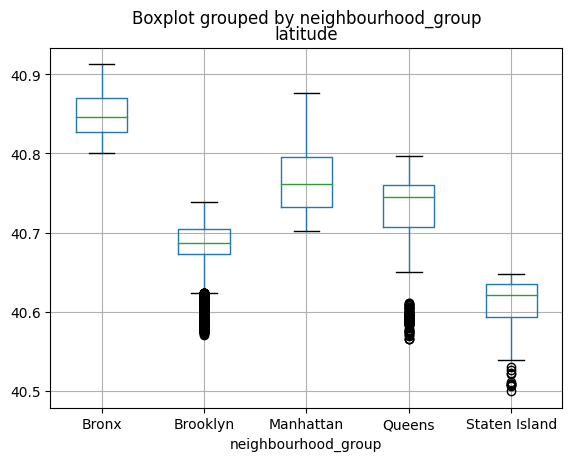

In [62]:
df.boxplot('latitude',by='neighbourhood_group')

### 3D Plot **neighbourhood_group vs latitude vs longitude**

In [63]:
X=[]
Y=[]
T=[]
for i in df['latitude']:
  X.append(i);

for i in df['longitude']:
  Y.append(i);

for i in df['neighbourhood_group']:
  if(i=='Brooklyn'):
    T.append(0)
  elif(i=='Bronx'):
    T.append(1)
  elif(i=='Manhattan'):
    T.append(2)
  elif(i=='Queens'):
    T.append(3)
  else:
    T.append(4)

In [64]:
print(X)
print(Y)
print(T)

[40.64749, 40.75362, 40.80902, 40.68514, 40.79851, 40.74767, 40.68688, 40.76489, 40.80178, 40.71344, 40.80316, 40.76076, 40.66829, 40.79826, 40.7353, 40.70837, 40.69169, 40.74192, 40.67592, 40.79685, 40.71842, 40.68069, 40.67989, 40.68001, 40.68371, 40.65599, 40.86754, 40.76715, 40.86482, 40.7292, 40.82245, 40.81305, 40.72219, 40.8213, 40.6831, 40.66869, 40.68876, 40.70186, 40.63702, 40.71401, 40.7229, 40.66278, 40.69673, 40.79009, 40.81175, 40.65944, 40.74771, 40.68111, 40.68554, 40.69142, 40.68043, 40.78635, 40.7042, 40.73506, 40.73961, 40.70881, 40.72004, 40.75531, 40.72401, 40.7221, 40.71185, 40.74623, 40.77065, 40.67811, 40.69, 40.75979, 40.67343, 40.72649, 40.70933, 40.72298, 40.80164, 40.72162, 40.76342, 40.83139, 40.68346, 40.72828, 40.76865, 40.75038, 40.6932, 40.74138, 40.71154, 40.82915, 40.71851, 40.65401, 40.7114, 40.69723, 40.71833, 40.72334, 40.72912, 40.71156, 40.70032, 40.68233, 40.68634, 40.68035, 40.70984, 40.70093, 40.79764, 40.82803, 40.74008, 40.68413, 40.82279, 4

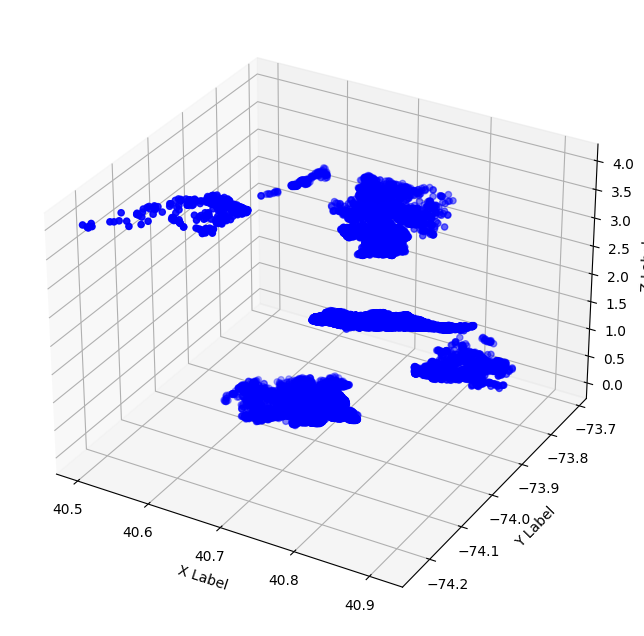

In [65]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()

t = np.array(T) #neighbourhood_group
x = np.array(X) #latitude
y = np.array(Y) #longitude

#so both latitude and longitude together defines a neighbour_hood group
#unlike one only

ax.scatter(x,y,t, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Tests for dropping "neighbourhood"

### scatter-plot **Neighbourhood_group vs Price**

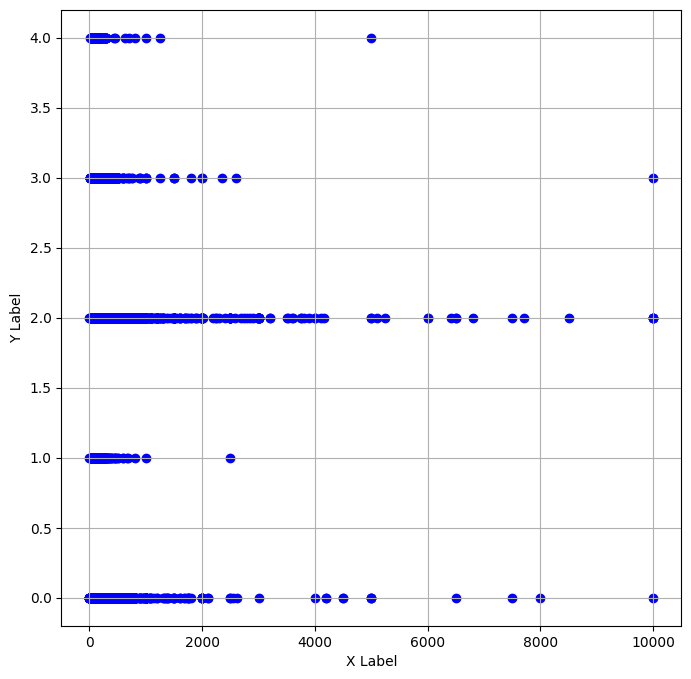

In [66]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes()
ax.grid()

t = np.array(T) #neighbourhood_group
s = df['price']

#so both latitude and longitude together defines a neighbour_hood group
#unlike one only

ax.scatter(s,t, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

### box-plot **Neighbourhood_group vs Price**

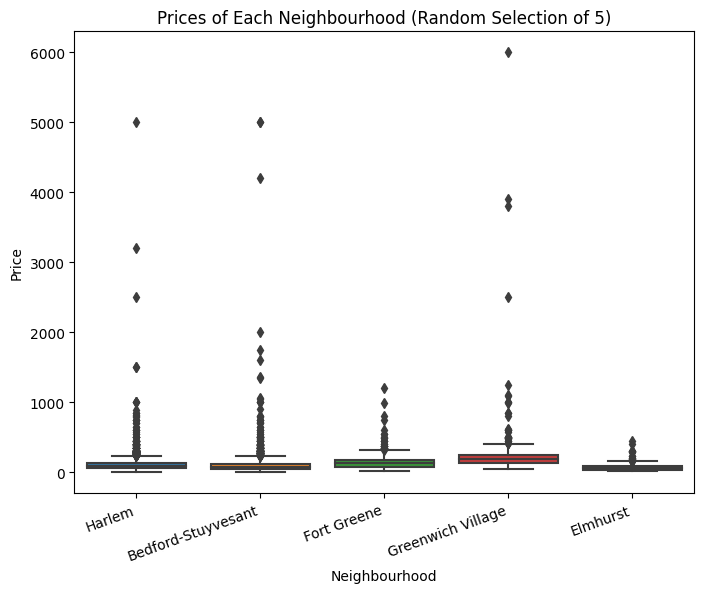

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Randomly select 10 neighbourhoods
random_neighbourhoods = df['neighbourhood'].sample(n=5, random_state=22)

# Filter the DataFrame for the selected neighbourhoods
subset_df = df[df['neighbourhood'].isin(random_neighbourhoods)]

# Set the order of neighbourhoods for the categorical x-axis
neighbourhood_order = subset_df['neighbourhood'].unique()

# Plot prices for each neighbourhood
plt.figure(figsize=(8, 6))
sns.boxplot(x='neighbourhood', y='price', data=subset_df, order=neighbourhood_order)
plt.title('Prices of Each Neighbourhood (Random Selection of 5)')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Test for number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='price'>

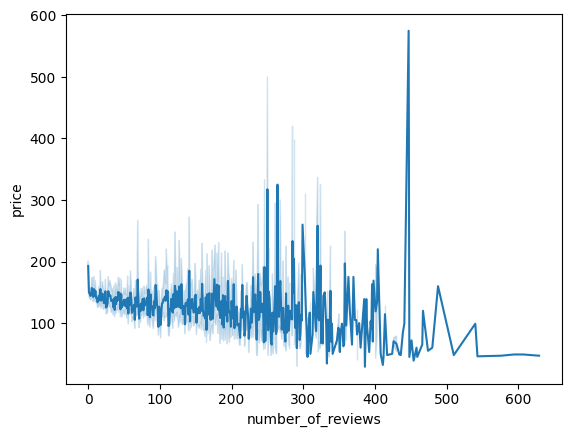

In [68]:
sns.lineplot(x=df.number_of_reviews,y=df.price)

In [69]:
correlation = df['number_of_reviews'].corr(df['price'])
print(f"Correlation between 'reviews_per_month' and 'price': {correlation}")

Correlation between 'reviews_per_month' and 'price': -0.047954226582662185


## Test for availability

In [70]:
correlation = df['availability_365'].corr(df['price'])
print(f"Correlation between 'availability_365' and 'price': {correlation}")

Correlation between 'availability_365' and 'price': 0.08182882742168796


# Pre-processing

In [71]:
"""

Things to drop:

id - all are unique,
name - same names of similar houses ,
host_name - same names of different hosts ,
host_id - similar as above ,
latitute - can be inferred from neighbourhood_group ,
longitude - can be inferred from neighbourhood_group ,
last_review - lots of missing values ,
reviews_per_month - very low correlation with price ,
calculated_host_listings_count - 37k / 48k are unique hosts ,
number_of_reviews - low correlation ,
availability_365 - low correlation ,

Things MAYBE to drop:

neighbourhood - neighbourhood_group gives us the required information

"""

'\n\nThings to drop:\n\nid - all are unique,\nname - same names of similar houses ,\nhost_name - same names of different hosts ,\nhost_id - similar as above ,\nlatitute - can be inferred from neighbourhood_group ,\nlongitude - can be inferred from neighbourhood_group ,\nlast_review - lots of missing values ,\nreviews_per_month - very low correlation with price ,\ncalculated_host_listings_count - 37k / 48k are unique hosts ,\nnumber_of_reviews - low correlation ,\navailability_365 - low correlation ,\n\nThings MAYBE to drop:\n\nneighbourhood - neighbourhood_group gives us the required information\n\n'

### Dropping Columns

In [72]:
# list of columns to be dropped
columns_to_drop = ['id', 'name','host_id','host_name', 'neighbourhood', 'last_review','reviews_per_month','calculated_host_listings_count']

# drop the columns
df = base_df.drop(columns=columns_to_drop)

### Outlier Removal

#### validating the IQR approach

In [73]:
# checking if any NA values exist in any columns
print(df.isna().sum())

neighbourhood_group    0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
dtype: int64


In [74]:
# Calculate IQR for each category
result = df.groupby('neighbourhood_group')['price'].apply(lambda x: str(x.quantile(0.75)) +" " + str(x.quantile(0.25))).reset_index(name='IQR')
print(result)

  neighbourhood_group         IQR
0               Bronx   99.0 45.0
1            Brooklyn  150.0 60.0
2           Manhattan  220.0 95.0
3              Queens  110.0 50.0
4       Staten Island  110.0 50.0


In [75]:
# count of records for Brooklyn
print("Number of records with Brooklyn: ", len(df[df.neighbourhood_group=='Brooklyn']))

# count of records for Brooklyn inside it's IQR = [60 , 151]
filtered_df = df[(df['neighbourhood_group'] == 'Brooklyn') & (df['price'].between(60, 151))]
print("Number of records with Brooklyn inside it's IQR: ", len(filtered_df))

Number of records with Brooklyn:  20104
Number of records with Brooklyn inside it's IQR:  11203


#### Outlier removal using IQR

In [76]:
# calculate 1st and 3rd Quartile
result = df.groupby('neighbourhood_group')['price'].apply(lambda x: [x.quantile(0.75),x.quantile(0.25)]).reset_index(name='IQR')

In [77]:
editted_df = pd.DataFrame(columns=df.columns)

for col in df['neighbourhood_group'].unique():

  IQR = result[result.neighbourhood_group==col].IQR # IQR for the current neighbourhood_group
  IQR = IQR.tolist()[0] # converting the series to list
  IQR_range=IQR[0]-IQR[1] # calculating the IQR range

  # UpperLimit and LowerLimit based on IQR
  filtered_df = df[(df['neighbourhood_group'] == col) & (df['price'].between(IQR[1]-1.5*IQR_range, IQR[0]+1.5*IQR_range))]

  # append the data about this particular neighbourhood_group to the complete dataframe
  editted_df = pd.concat([editted_df, filtered_df],ignore_index=True)

In [78]:
df = editted_df
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,365
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,194
2,Brooklyn,40.68688,-73.95596,Private room,60,45,49,0
3,Brooklyn,40.66829,-73.98779,Private room,89,4,167,314
4,Brooklyn,40.70837,-73.95352,Entire home/apt,140,2,148,46


### Label Encoding "neighbourhood_group" and "root_type"

In [79]:
le = LabelEncoder() # initialize the lib

In [80]:
leNG = LabelEncoder() # initialize the lib
df['neighbourhood_group'] = leNG.fit_transform(df['neighbourhood_group'] )
# label encoder will train using this fit_transform
print(df.head())

   neighbourhood_group  latitude  longitude        room_type price  \
0                    1  40.64749  -73.97237     Private room   149   
1                    1  40.68514  -73.95976  Entire home/apt    89   
2                    1  40.68688  -73.95596     Private room    60   
3                    1  40.66829  -73.98779     Private room    89   
4                    1  40.70837  -73.95352  Entire home/apt   140   

  minimum_nights number_of_reviews availability_365  
0              1                 9              365  
1              1               270              194  
2             45                49                0  
3              4               167              314  
4              2               148               46  


In [81]:
leRT = LabelEncoder() # initialize the lib
df['room_type'] = leRT.fit_transform(df['room_type'] )
# label encoder will train using this fit_transform
print(df.head())

   neighbourhood_group  latitude  longitude  room_type price minimum_nights  \
0                    1  40.64749  -73.97237          1   149              1   
1                    1  40.68514  -73.95976          0    89              1   
2                    1  40.68688  -73.95596          1    60             45   
3                    1  40.66829  -73.98779          1    89              4   
4                    1  40.70837  -73.95352          0   140              2   

  number_of_reviews availability_365  
0                 9              365  
1               270              194  
2                49                0  
3               167              314  
4               148               46  


In [82]:
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['number_of_reviews']=pd.to_numeric(df['number_of_reviews'],errors='coerce')
df['availability_365']=pd.to_numeric(df['availability_365'],errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [83]:
base_df = df
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46202 entries, 0 to 46201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46202 non-null  int64  
 1   latitude             46202 non-null  float64
 2   longitude            46202 non-null  float64
 3   room_type            46202 non-null  int64  
 4   price                46202 non-null  int64  
 5   minimum_nights       46202 non-null  int64  
 6   number_of_reviews    46202 non-null  int64  
 7   availability_365     46202 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.8 MB


### [ REDUNDANT ] One-Hot Encoding "neighbourhood_group" and "root_type"

In [84]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=False)

# Print the DataFrame after one-hot encoding
df_encoded.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,room_type_0,room_type_1,room_type_2
0,40.64749,-73.97237,149,1,9,365,0,1,0,0,0,0,1,0
1,40.68514,-73.95976,89,1,270,194,0,1,0,0,0,1,0,0
2,40.68688,-73.95596,60,45,49,0,0,1,0,0,0,0,1,0
3,40.66829,-73.98779,89,4,167,314,0,1,0,0,0,0,1,0
4,40.70837,-73.95352,140,2,148,46,0,1,0,0,0,1,0,0


In [85]:
#code-block for onehot encoding for now
# df = df_encoded

converting the columns to **numeric types**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46202 entries, 0 to 46201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46202 non-null  int64  
 1   latitude             46202 non-null  float64
 2   longitude            46202 non-null  float64
 3   room_type            46202 non-null  int64  
 4   price                46202 non-null  int64  
 5   minimum_nights       46202 non-null  int64  
 6   number_of_reviews    46202 non-null  int64  
 7   availability_365     46202 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.8 MB


In [87]:
#transformation tried

# df['price_log'] = np.log(df.price+1)
# df.head()

## Split Train-Test data

In [88]:
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['number_of_reviews']=pd.to_numeric(df['number_of_reviews'],errors='coerce')
df['availability_365']=pd.to_numeric(df['availability_365'],errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [89]:
# independent variables
x = df.drop(columns=['price'])
x = sm.add_constant(x)

# target variable
y = df['price']

In [90]:
x.head()

,const,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,availability_365
0,1.0,1,40.64749,-73.97237,1,1,9,365
1,1.0,1,40.68514,-73.95976,0,1,270,194
2,1.0,1,40.68688,-73.95596,1,45,49,0
3,1.0,1,40.66829,-73.98779,1,4,167,314
4,1.0,1,40.70837,-73.95352,0,2,148,46


In [91]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46202 entries, 0 to 46201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                46202 non-null  float64
 1   neighbourhood_group  46202 non-null  int64  
 2   latitude             46202 non-null  float64
 3   longitude            46202 non-null  float64
 4   room_type            46202 non-null  int64  
 5   minimum_nights       46202 non-null  int64  
 6   number_of_reviews    46202 non-null  int64  
 7   availability_365     46202 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [92]:
y.head()

0    149
1     89
2     60
3     89
4    140
Name: price, dtype: int64

In [93]:
print(x)

       const  neighbourhood_group  latitude  longitude  room_type  \
0        1.0                    1  40.64749  -73.97237          1   
1        1.0                    1  40.68514  -73.95976          0   
2        1.0                    1  40.68688  -73.95596          1   
3        1.0                    1  40.66829  -73.98779          1   
4        1.0                    1  40.70837  -73.95352          0   
...      ...                  ...       ...        ...        ...   
46197    1.0                    0  40.83926  -73.91173          1   
46198    1.0                    0  40.83146  -73.89666          0   
46199    1.0                    0  40.83502  -73.91058          1   
46200    1.0                    0  40.83372  -73.91187          1   
46201    1.0                    0  40.80787  -73.92400          0   

       minimum_nights  number_of_reviews  availability_365  
0                   1                  9               365  
1                   1                270         

In [94]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=30)

# Regression

### Split Train-Test for Regression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46202 entries, 0 to 46201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46202 non-null  int64  
 1   latitude             46202 non-null  float64
 2   longitude            46202 non-null  float64
 3   room_type            46202 non-null  int64  
 4   price                46202 non-null  int64  
 5   minimum_nights       46202 non-null  int64  
 6   number_of_reviews    46202 non-null  int64  
 7   availability_365     46202 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.8 MB


In [ ]:
regression_columns_to_drop = ['latitude', 'longitude']
df = base_df.drop(columns = regression_columns_to_drop)
df = sm.add_constant(df)

In [ ]:
# independent variables
x = df.drop(columns=['price'])

# target variable
y = df['price']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=30)

### OLS Regression

In [ ]:
# Create and fit the regression model
model = sm.OLS(ytrain, xtrain)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

# Make predictions on the test set
ypred = results.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     4138.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:40:11   Log-Likelihood:            -2.0329e+05
No. Observations:               36961   AIC:                         4.066e+05
Df Residuals:                   36955   BIC:                         4.066e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 148.1887    

### Linear Regression

In [ ]:
xtrain.head()

,const,neighbourhood_group,room_type,minimum_nights,number_of_reviews,availability_365
31228,1.0,2,0,30,1,3
11382,1.0,1,1,1,21,130
3753,1.0,1,0,2,23,190
35446,1.0,2,2,2,15,96
17156,1.0,1,2,30,1,341


In [ ]:
########################################################    tried scaling negligible effect    #################################################

# from sklearn.preprocessing import StandardScaler
# # Create an instance of StandardScaler
# scaler = StandardScaler()
# # Fit the scaler to your data and transform it
# x= scaler.fit_transform(x)
# # Now, scaled_data contains the standardized values
# print(x)
# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = model.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Calculate Mean Absolute Percentage Error (MAPE)
ytest_replace0with1=ytest.replace(0,1);
mape = 100 * np.mean(np.abs((ytest - ypred) / ytest_replace0with1))



# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Mape error (mape):{mape}')

Mean Squared Error (MSE): 3516.511152261501
R-squared (R2): 0.3489601142300838
Mape error (mape):46.806299561877644


In [ ]:
ypredhead=model.predict(xtest)

In [ ]:
# Plot using y1 and y2 values
# Sample data
x_values = [i for i in range(1000,1020)]
y1_values = ypred[1000:1020]
y2_values = ytest.tolist()[1000:1020]

In [ ]:
print(x_values)
print(y1_values)
print(y2_values)

[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019]
[109.84413213 182.39068328 141.34146271 102.96308677  87.25562725
  75.81988117  92.03656211 165.61766283 100.53418984 155.33420245
 153.41822139  84.09327179  19.15310069 163.64169841  81.01987587
  92.58091599 154.6184737  182.51151338 161.67552213  87.15421982]
[40, 191, 160, 73, 53, 50, 89, 140, 55, 112, 199, 85, 59, 153, 120, 50, 169, 210, 160, 100]


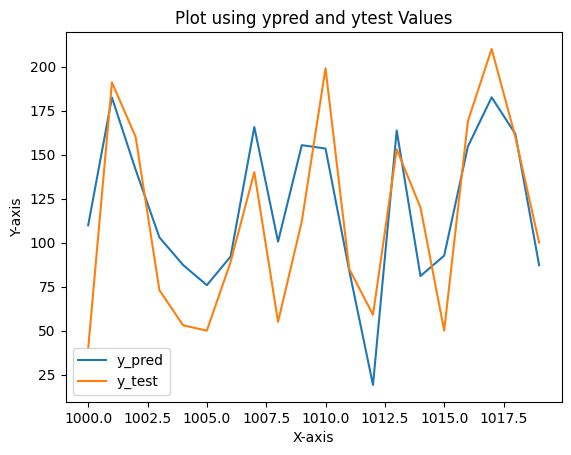

In [ ]:
plt.plot(x_values, y1_values, label='y_pred')
plt.plot(x_values, y2_values, label='y_test')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot using ypred and ytest Values')
plt.legend()
plt.show()

#Neural Network

### Split Train-Test for Neural Network

In [95]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46202 entries, 0 to 46201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46202 non-null  int64  
 1   latitude             46202 non-null  float64
 2   longitude            46202 non-null  float64
 3   room_type            46202 non-null  int64  
 4   price                46202 non-null  int64  
 5   minimum_nights       46202 non-null  int64  
 6   number_of_reviews    46202 non-null  int64  
 7   availability_365     46202 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.8 MB


In [96]:
nn_columns_to_drop = []
df = base_df.drop(columns = nn_columns_to_drop)
# df = sm.add_constant(df)

In [97]:
# independent variables
x = df.drop(columns=['price'])

# target variable
y = df['price']

In [98]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
x= scaler.fit_transform(x)

# Now, scaled_data contains the standardized values
print(x)

[[-0.91412293 -1.4865345  -0.45152882 ... -0.29517912 -0.32694499
   1.96136162]
 [-0.91412293 -0.80118414 -0.1761192  ... -0.29517912  5.45684636
   0.64913438]
 [-0.91412293 -0.76951058 -0.09312502 ...  1.86761089  0.55945982
  -0.83959126]
 ...
 [-2.27327553  1.92711099  0.89800017 ... -0.2460248  -0.52638607
   1.95368777]
 [-2.27327553  1.90344684  0.86982583 ... -0.2460248  -0.52638607
  -0.21800994]
 [-2.27327553  1.4328942   0.60489969 ... -0.29517912 -0.48206583
  -0.53263752]]


In [99]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=30)

### Model Tranining

In [ ]:
print(xtrain)

[[ 0.44502966  1.1396407  -0.33795784 ...  1.13029611 -0.50422595
  -0.81656973]
 [-0.91412293 -1.64963515 -1.41054837 ... -0.29517912 -0.06102355
   0.15800839]
 [-0.91412293 -0.86289298  0.87921728 ... -0.2460248  -0.01670331
   0.618439  ]
 ...
 [ 3.16333486 -1.8817259  -2.66157639 ... -0.29517912 -0.50422595
  -0.83959126]
 [-0.91412293 -1.28702746 -0.20997209 ... -0.14771616 -0.45990571
  -0.83959126]
 [ 0.44502966  0.3133976  -1.05935196 ... -0.19687048 -0.48206583
  -0.57100674]]


In [ ]:
print(ytrain)

31228    175
11382     51
3753      90
35446     45
17156     35
        ... 
919       75
33268    200
44845     75
4517      89
38693    240
Name: price, Length: 36961, dtype: int64


In [ ]:
# Assume X_train, X_test, y_train, y_test are already defined

#grid search (a type of hyper-parameter tuning), will iterate all pair of combination
params = {
    'hidden_layer_sizes': [(100, 50, 25),(500,350,200,100,50)],
    #(100,), (50, 50) #(1000,500,250,125,62,31)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01] #learning rate (eeta -> in terms of back propogation)
}

best_mae = np.inf
best_mse = np.inf
best_r2 = -np.inf
best_params = {}

for hl in params['hidden_layer_sizes']:
    for act in params['activation']:
        for alpha in params['alpha']:
            mlp = MLPRegressor(hidden_layer_sizes=hl, activation=act, alpha=alpha, max_iter=50, random_state=42)
            mlp.fit(xtrain, ytrain)
            ypred = mlp.predict(xtest)

            mae = mean_absolute_error(ytest, ypred)
            mse = mean_squared_error(ytest, ypred)
            r2 = r2_score(ytest, ypred)

            print("Parameters:", {hl, act, alpha})
            print("R2:", r2, "        MAE:", mae, "      MSE:", mse)
            print()

            if r2 > best_r2:
                best_mae = mae
                best_mse = mse
                best_r2 = r2
                best_params = {'hidden_layer_sizes': hl, 'activation': act, 'alpha': alpha}


print("Best Parameters:", best_params)
print("MAE:", best_mae)
print("MSE:", best_mse)
print("RMSE:", np.sqrt(best_mse))
print("R2:", best_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Parameters: {(100, 50, 25), 'relu', 0.0001}
R2: 0.5491578427175796         MAE: 34.5379193613014       MSE: 2435.1679653519072



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Parameters: {(100, 50, 25), 'relu', 0.001}
R2: 0.4292319878763695         MAE: 39.392552438385586       MSE: 3082.9325880906276



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Parameters: {(100, 50, 25), 'relu', 0.01}
R2: 0.5552632254683181         MAE: 34.50338343082796       MSE: 2402.19049807061



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Parameters: {(100, 50, 25), 'tanh', 0.0001}
R2: -2.3387461903943945         MAE: 112.40360073782288       MSE: 18033.823226065415



In [107]:
mlp = MLPRegressor(hidden_layer_sizes=(500, 350, 200, 100, 50), activation='relu', alpha=0.01, max_iter=50, random_state=42)
mlp.fit(xtrain, ytrain)
ypred = mlp.predict(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("Parameters:", {(500, 350, 200, 100, 50), "relu", 0.01})
print("R2:", r2, "        MAE:", mae, "      MSE:", mse)
print()

Parameters: {(500, 350, 200, 100, 50), 'relu', 0.01}
R2: 0.47567722886811725         MAE: 37.05100700465107       MSE: 2832.064382490895



In [109]:
# Plot using y1 and y2 values
# Sample data
s = 400
e = 420
x_values = [i for i in range(s,e)]
y1_values = ypred[s:e]
y2_values = ytest.tolist()[s:e]

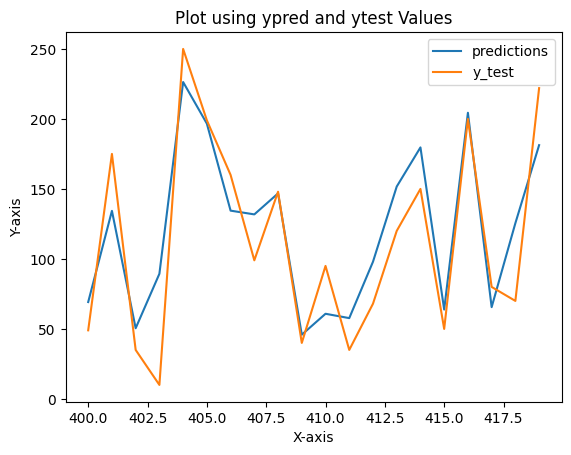

In [110]:
plt.plot(x_values, y1_values, label='predictions')
plt.plot(x_values, y2_values, label='y_test')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot using ypred and ytest Values')
plt.legend()
plt.show()

# Decision Tree Regressor

### Train-Test Split

In [100]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46202 entries, 0 to 46201
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  46202 non-null  int64  
 1   latitude             46202 non-null  float64
 2   longitude            46202 non-null  float64
 3   room_type            46202 non-null  int64  
 4   price                46202 non-null  int64  
 5   minimum_nights       46202 non-null  int64  
 6   number_of_reviews    46202 non-null  int64  
 7   availability_365     46202 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.8 MB


In [101]:
dt_columns_to_drop = []
df = base_df.drop(columns = dt_columns_to_drop)
# df = sm.add_constant(df)

In [102]:
# independent variables
x = df.drop(columns=['price'])

# target variable
y = df['price']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=30)

In [103]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36961 entries, 31228 to 38693
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  36961 non-null  int64  
 1   latitude             36961 non-null  float64
 2   longitude            36961 non-null  float64
 3   room_type            36961 non-null  int64  
 4   minimum_nights       36961 non-null  int64  
 5   number_of_reviews    36961 non-null  int64  
 6   availability_365     36961 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.3 MB


### Model Fitting

In [104]:
DTree=DecisionTreeRegressor(min_samples_leaf=.002)
DTree.fit(xtrain,ytrain)

ypred=DTree.predict(xtest)

print('R-squared score (training): {:.3f}'.format(DTree.score(xtrain, ytrain)))
print('R-squared score (test): {:.3f}'.format(DTree.score(xtest, ytest)))

R-squared score (training): 0.589
R-squared score (test): 0.551


In [105]:
# Plot using y1 and y2 values
# Sample data
s = 890
e = 910
x_values = [i for i in range(s,e)]
y1_values = ypred[s:e]
y2_values = ytest.tolist()[s:e]

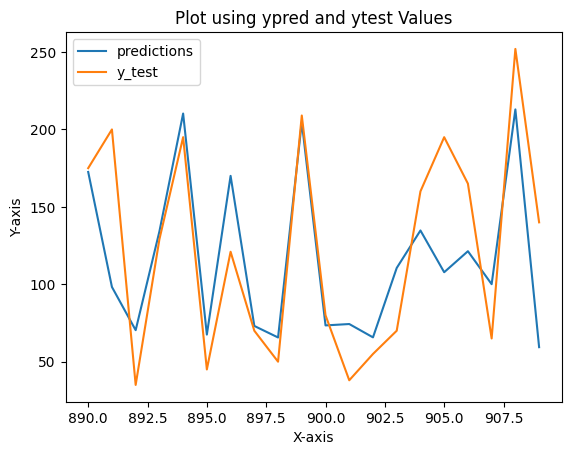

In [106]:
plt.plot(x_values, y1_values, label='predictions')
plt.plot(x_values, y2_values, label='y_test')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot using ypred and ytest Values')
plt.legend()
plt.show()